### Example: uniform distribution

_Author: Christoph Rahmede_

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

from scipy import stats

In [2]:
uniform = stats.uniform(-0.5, 1)

In [3]:
uniform.mean(), uniform.std()

(0.0, 0.28867513459481287)

#### Confidence Intervals for the mean

In [4]:
norm = stats.norm(loc=0, scale=1)
z_95 = norm.ppf(1-0.05/2)
z_95

1.959963984540054

In [5]:
n = 100
standard = 1
intervals = [np.mean(uniform.rvs(n))+z_95*uniform.std()/n **
             0.5*np.array([-1, 1]) for i in range(1000)]

In [6]:
np.mean([1 if np.allclose(np.sign(interval), np.array([-1, 1]))
         else 0 for interval in intervals])

0.941

iteration not covering true value: 2
iteration not covering true value: 8
iteration not covering true value: 32
iteration not covering true value: 37
iteration not covering true value: 45
iteration not covering true value: 59
iteration not covering true value: 75
iteration not covering true value: 78
iteration not covering true value: 96


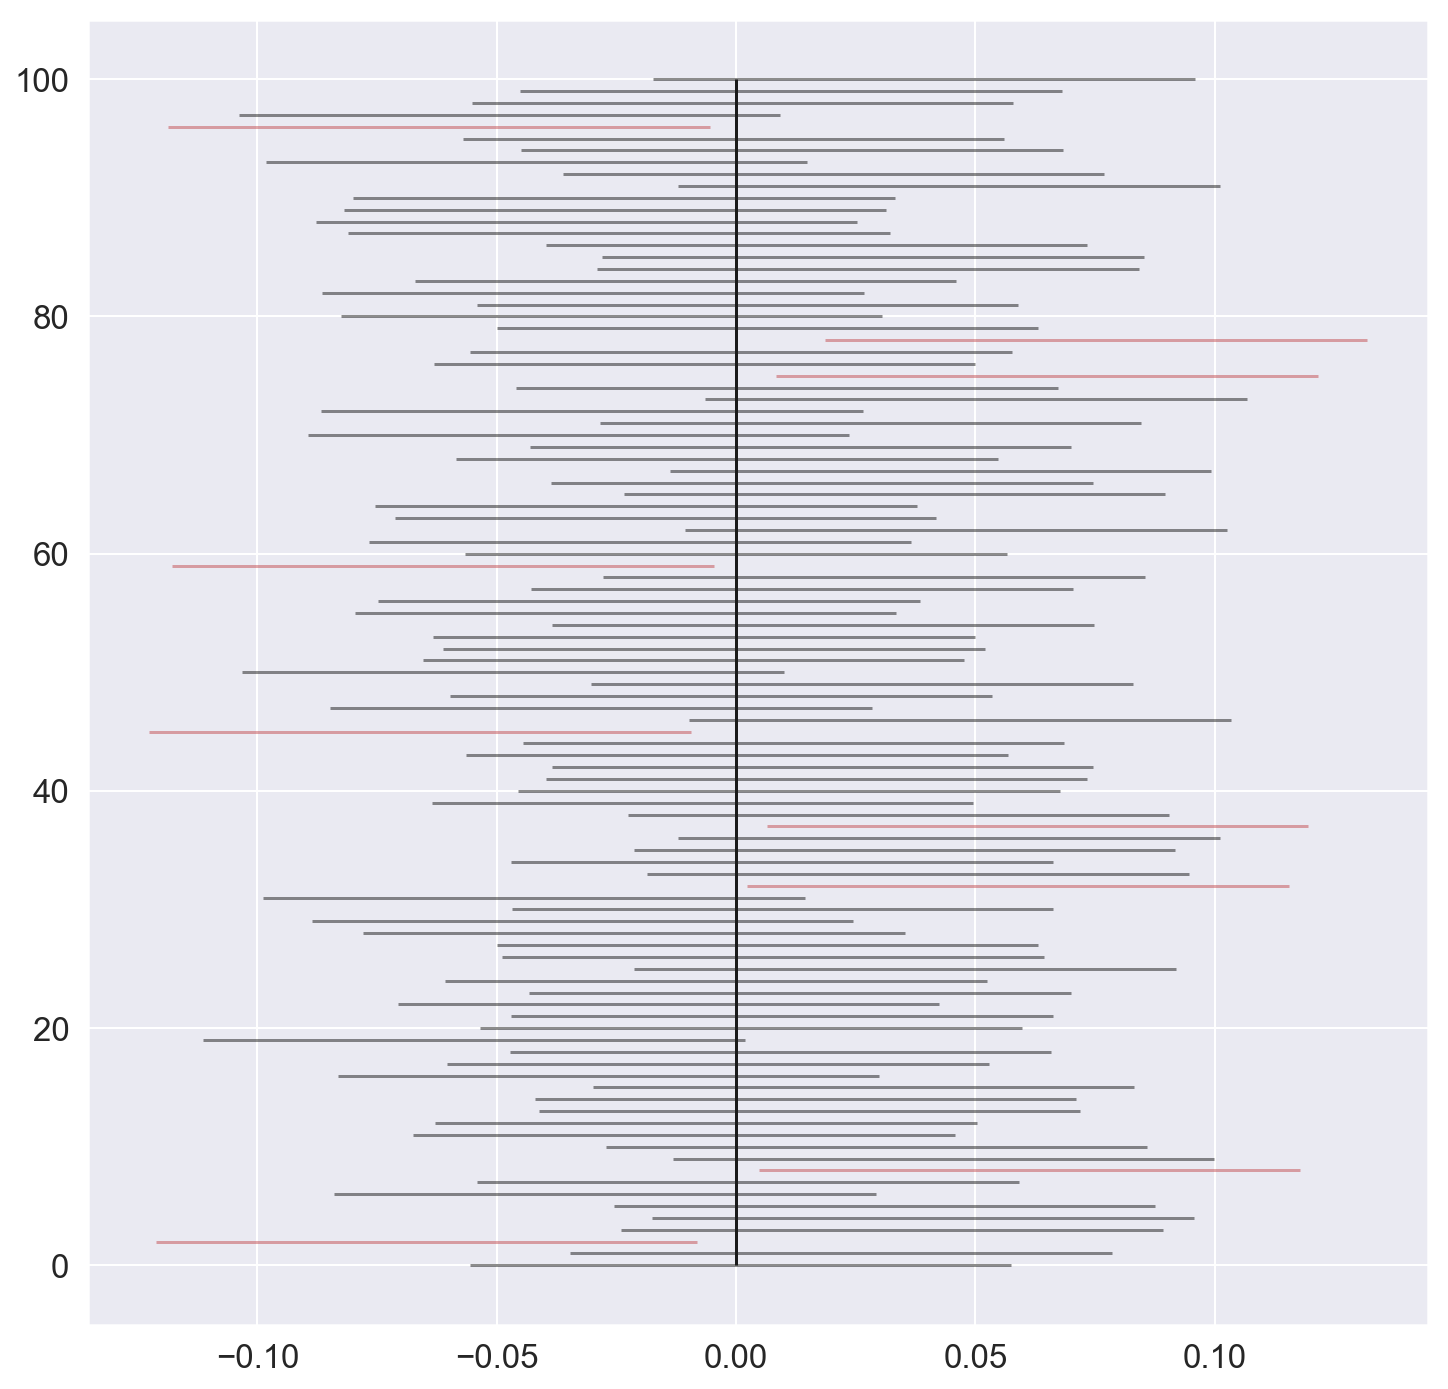

In [7]:
plt.figure(figsize=(12, 12))
for i in range(len(intervals[:101])):
    color = 'k'
    if (intervals[i][0] > 0) or (intervals[i][1] < 0):
        color = 'r'
        print('iteration not covering true value:', i)
    plt.hlines(i, intervals[i][0], intervals[i][1], color=color, alpha=0.5)
plt.vlines(0, 0, i, color='k')
plt.show()

#### Confidence intervals for the standard deviation

In [8]:
n = 100
standard = 1
chi_2 = stats.chi2(n-1)
chi2_bound = np.array(chi_2.interval(0.95))
intervals = [(np.sqrt((n-1)/chi2_bound)*np.std(uniform.rvs(n)))
             for i in range(1000)]

In [9]:
np.mean([1 if np.allclose(np.sign(interval-uniform.std()),
                          np.array([1, -1])) else 0 for interval in intervals])

0.998

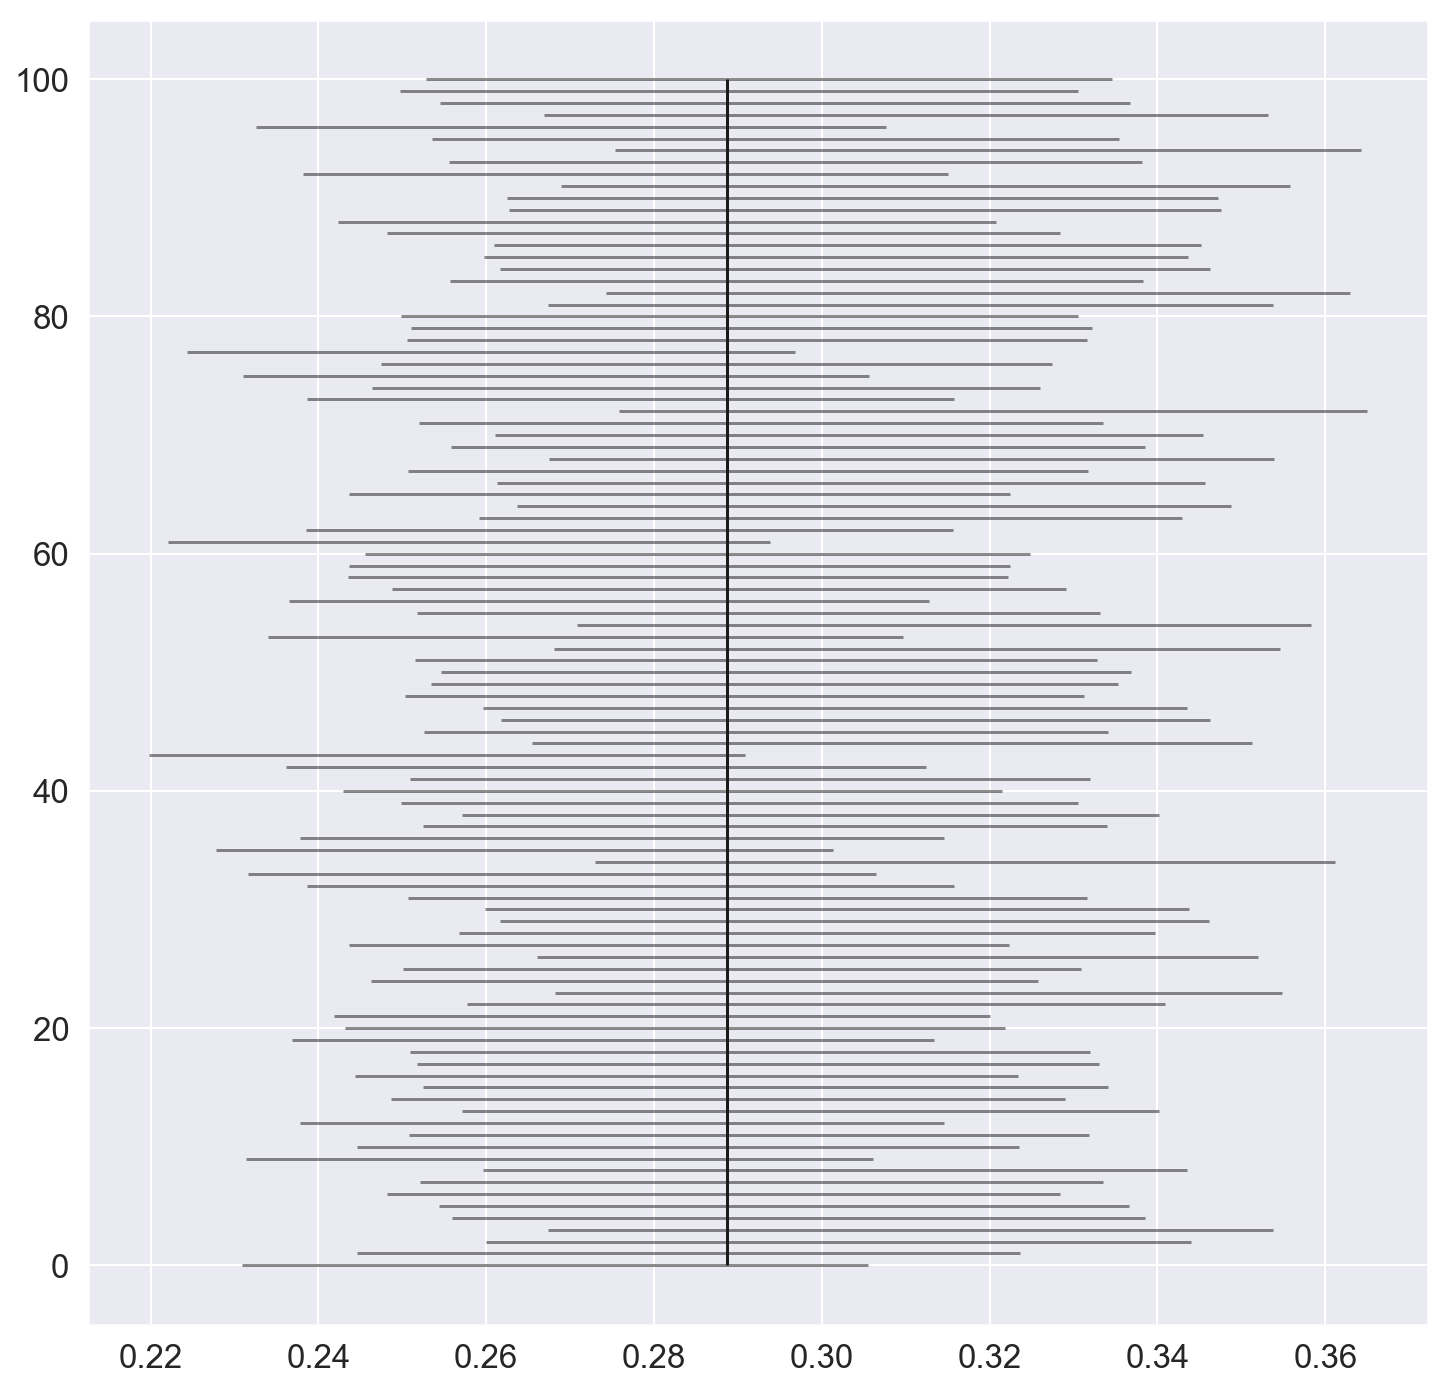

In [10]:
plt.figure(figsize=(12, 12))
for i in range(len(intervals[:101])):
    color = 'k'
    if ((intervals[i][0]-uniform.std()) < 0) or ((intervals[i][1]-uniform.std()) > 0):
        color = 'r'
        print(i)
    plt.hlines(i, intervals[i][0], intervals[i][1], color=color, alpha=0.5)
plt.vlines(uniform.std(), 0, i, color='k')
plt.show()